In [5]:
import pandas as pd

In [6]:
# dados é um DataFrame
df = pd.read_excel("https://github.com/SandraRojasZ/Machine-Learning-and-Time-Series/blob/main/Base_de_Dados/dataset_rolling_stones.xlsx?raw=true", engine='openpyxl')

In [7]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [9]:
df.shape

(1610, 15)

In [10]:
print("Data Inicial: ", df["release_date"].min())

Data Inicial:  1964-04-16 00:00:00


In [11]:
print("Data Final: ", df["release_date"].max())

Data Final:  2022-06-10 00:00:00


In [12]:
df.isnull().sum()

,0
name,0
album,0
release_date,0
track_number,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
liveness,0
loudness,0


In [13]:
df.duplicated().sum()

6

In [14]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [15]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [16]:
df["duracao_em_min"] = df["duration_ms"]/60000
df.head(3)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000


In [17]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


In [18]:
df.groupby("album")["duracao_em_min"].mean()

,duracao_em_min
album,
12 X 5,2.682068
12 x 5,2.682772
A Bigger Bang (2009 Re-Mastered),4.016356
A Bigger Bang (Live),5.176630
Aftermath,3.899185
...,...
Undercover,4.492750
Undercover (2009 Re-Mastered),4.497595
Voodoo Lounge (Remastered 2009),4.118779


Aula 4 - Análise Exploratória de Dados IV

In [19]:
import matplotlib.pyplot as plt

In [20]:
df_maior_duracao_musica = df.groupby("album")["duracao_em_min"].mean().sort_values(ascending=False)

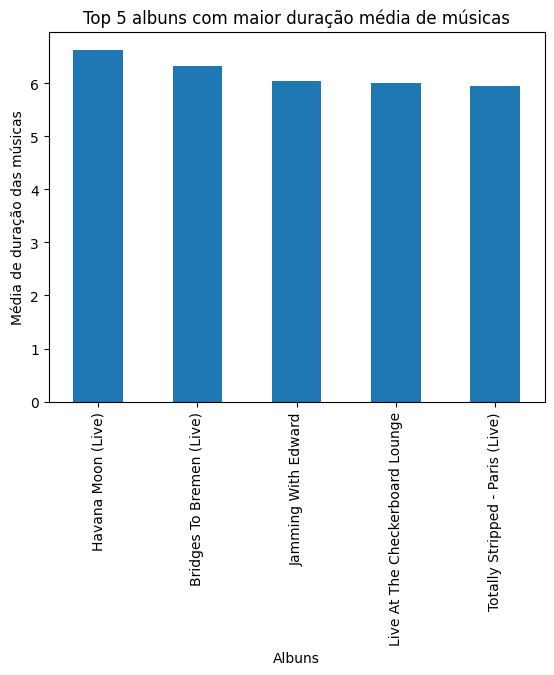

In [24]:
df_maior_duracao_musica.head(5).plot(kind="bar")
plt.xlabel("Albuns")
plt.ylabel("Média de duração das músicas")
plt.title("Top 5 albuns com maior duração média de músicas")
plt.show()

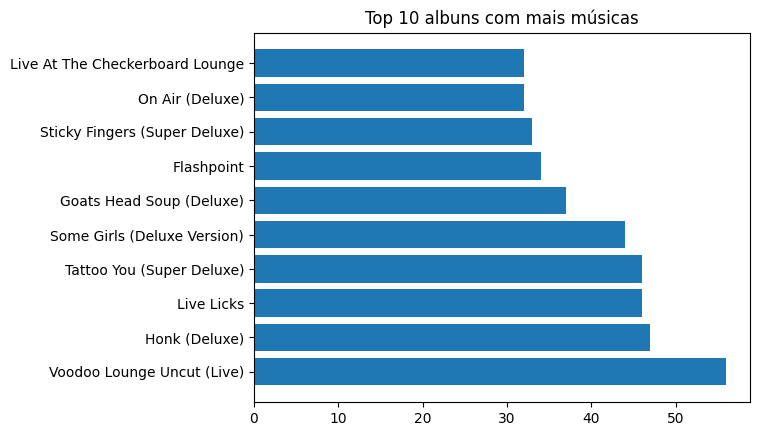

In [26]:
top_albuns = df['album'].value_counts().head(10)
plt.barh(top_albuns.index, top_albuns.values)
plt.title("Top 10 albuns com mais músicas")
plt.show()

In [27]:
top_albuns

,count
album,
Voodoo Lounge Uncut (Live),56
Honk (Deluxe),47
Live Licks,46
Tattoo You (Super Deluxe),46
Some Girls (Deluxe Version),44
Goats Head Soup (Deluxe),37
Flashpoint,34
Sticky Fingers (Super Deluxe),33
On Air (Deluxe),32


In [28]:
# Durante um período
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]

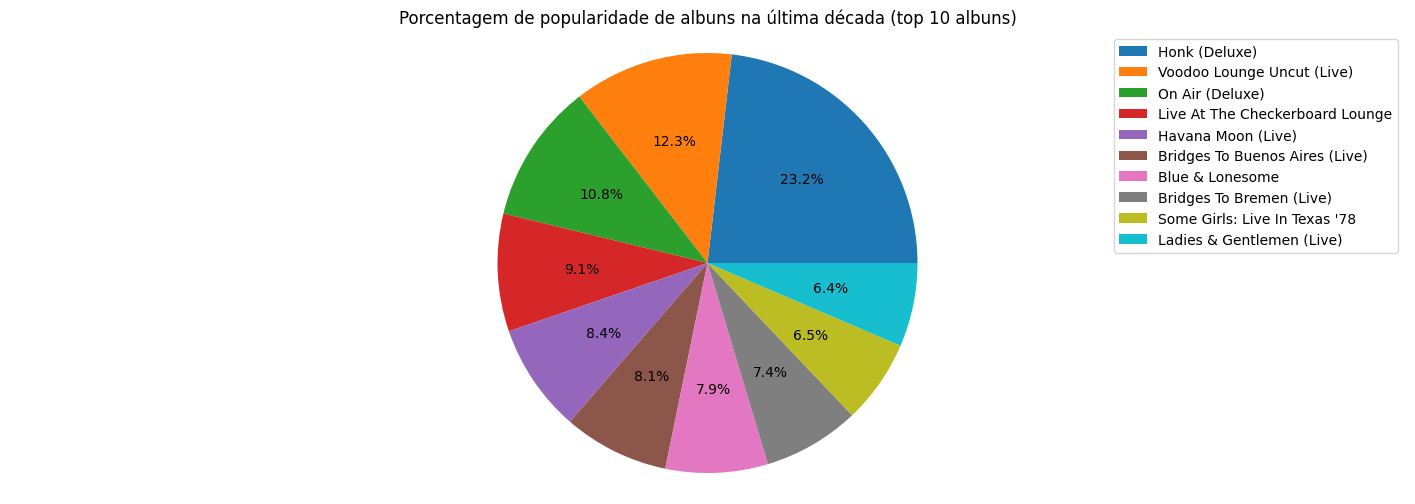

In [32]:
df_por_album = df_ultima_decada.groupby("album")["popularity"].sum().sort_values(ascending=False).head(10)
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100

labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("Porcentagem de popularidade de albuns na última década (top 10 albuns)")
plt.legend(labels, loc="best")
plt.show()

In [31]:
df_por_album

,popularity
album,
Honk (Deluxe),1232
Voodoo Lounge Uncut (Live),654
On Air (Deluxe),573
Live At The Checkerboard Lounge,482
Havana Moon (Live),445
Bridges To Buenos Aires (Live),433
Blue & Lonesome,419
Bridges To Bremen (Live),396
Some Girls: Live In Texas '78,344


In [33]:
import seaborn as sns

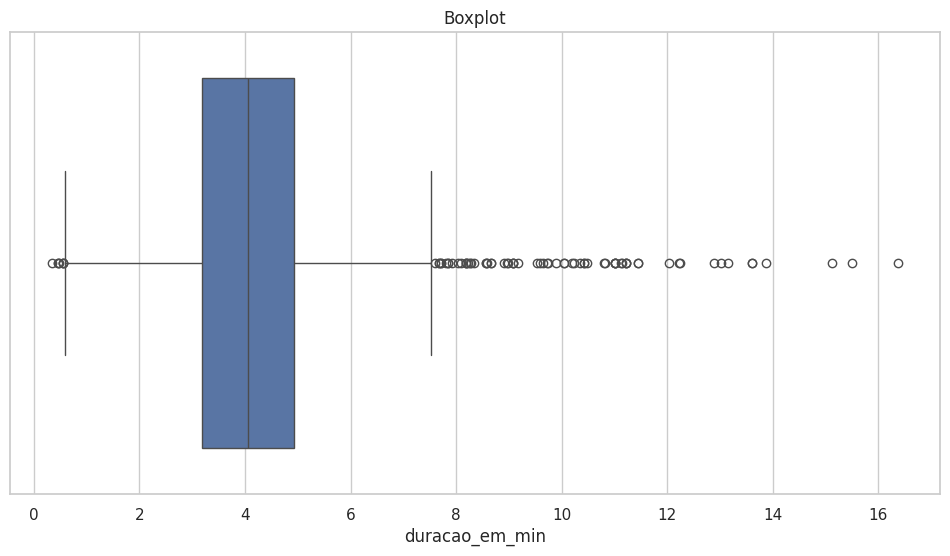

In [34]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x="duracao_em_min", data=df)
axes.set_title("Boxplot")
plt.show()

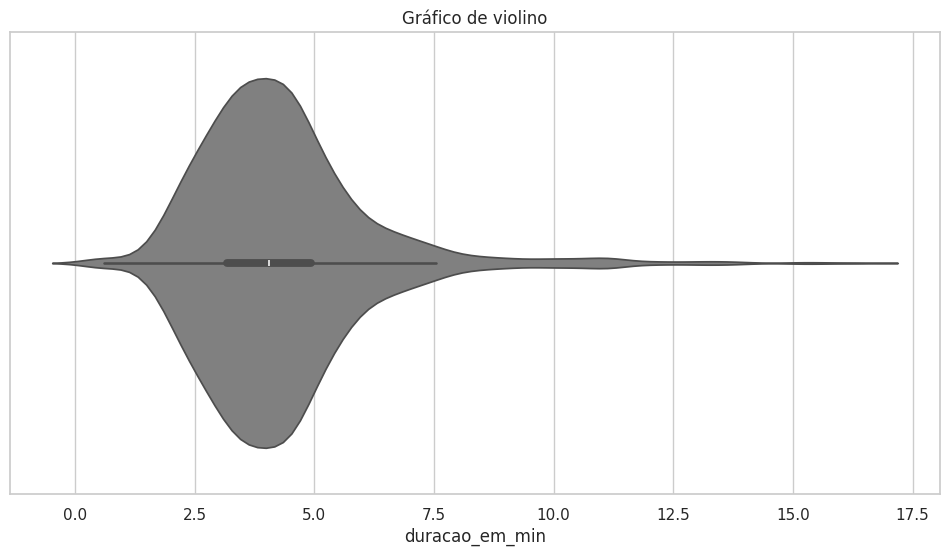

In [35]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axes.set_title("Gráfico de violino")
plt.show()

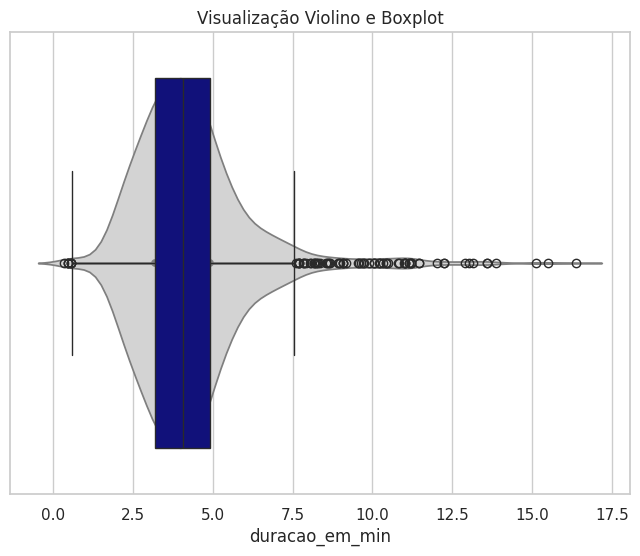

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x="duracao_em_min", data=df, ax=ax, color="lightgray")
sns.boxplot(x="duracao_em_min", data=df, ax=ax, whis=1.5, color="darkblue")

ax.set_title("Visualização Violino e Boxplot")
plt.show()

Aula 7 - Análise exploratória de dados VII